In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import leafmap

In [4]:
m = leafmap.Map(center=[43.946569, 4.805148], zoom=16)
m.add_basemap("Esri.WorldImagery")
m

Map(center=[43.946569, 4.805148], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [5]:
bbox = m.user_roi_bounds()
bbox

[4.7408, 43.8947, 4.9098, 43.9601]

In [6]:
import osmnx as ox

# Option 1: Your bbox as a tuple (west, south, east, north)  → also called (left, bottom, right, top)
bbox = (4.7408, 43.8947, 4.9098, 43.9601)   # example around Turin, Italy

# This is the NEW correct function name in recent OSMnx versions
G = ox.graph_from_bbox(
    bbox=bbox,                    # ← named argument
    network_type="drive",         # drive, walk, bike, all, etc.
    simplify=True,                # simplifies topology (recommended)
    retain_all=False,             # keep only largest connected component
    truncate_by_edge=True         # keeps nodes just outside bbox if connected
)

# Optional: project to UTM for analysis/plotting
G_proj = ox.project_graph(G)




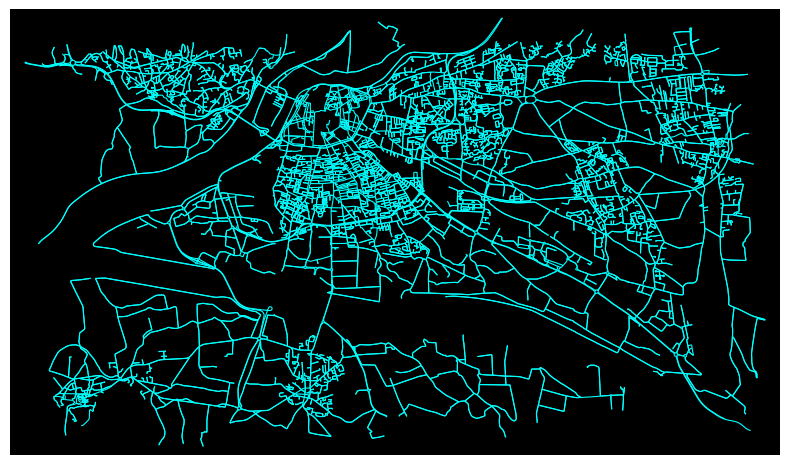

In [7]:
# Plot it
fig, ax = ox.plot_graph(G_proj, bgcolor="black", node_size=0, edge_color="#00FFFF", edge_linewidth=0.8, show=False, close=False)
fig.tight_layout()
fig.show()

In [ ]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_proj)

In [ ]:
# Save to file
gdf_edges.to_file("edges.geojson", driver="GeoJSON")